In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
data=pd.read_csv('datasets_423609_1206191_RELIANCE.csv', index_col='Date', parse_dates=['Date'])
data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.5,251.70,237.5,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.4,271.85,251.3,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN


In [4]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1433.00,1431.55,1442.31,17458503,2.518059e+15,388907.0,4083814.0,0.2339
2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1426.00,1424.05,1428.70,15330793,2.190317e+15,341795.0,7437964.0,0.4852
2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1449.85,1445.55,1430.20,16460764,2.354223e+15,348477.0,6524302.0,0.3964
2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1471.05,1472.25,1467.50,18519252,2.717698e+15,405603.0,8377100.0,0.4523
2020-05-29,RELIANCE,EQ,1472.25,1468.00,1472.00,1452.65,1470.00,1464.40,1462.79,18471770,2.702029e+15,300018.0,10292573.0,0.5572


In [5]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [6]:
data = data.fillna(method='ffill')

In [7]:
def plot_attribute(df, attritube ,start='2000', end='2020',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2020".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')
    
    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)
    
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)
    
    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])

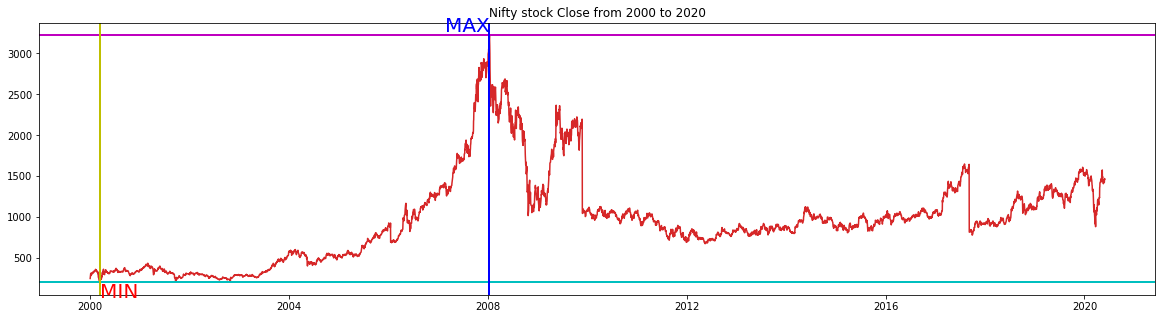

Max Value :   3220.85
Min Value :   203.2


In [8]:
plot_attribute(data,"Close",color='red')

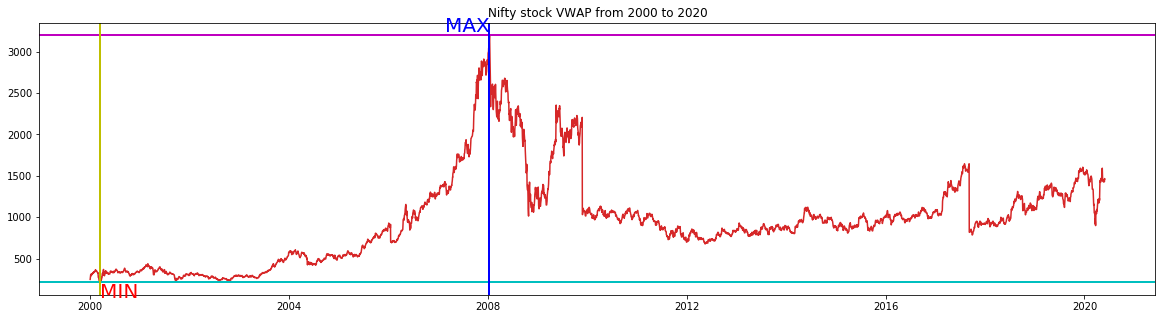

Max Value :   3197.75
Min Value :   212.29


In [9]:
plot_attribute(data,"VWAP",color='red')

In [9]:
OHLC_data = data['3-2020':'2020']

fig = go.Figure(data=go.Ohlc(x=OHLC_data.index,
                            open=OHLC_data['Open'],
                            high=OHLC_data['High'],
                            low=OHLC_data['Low'],
                            close=OHLC_data['Close']))

fig.update_layout(title_text='Reliance From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

In [10]:
Candlestick_data = data['3-2020':'2020']

fig = go.Figure(data=go.Candlestick(x=Candlestick_data.index,
                            open=Candlestick_data['Open'],
                            high=Candlestick_data['High'],
                            low=Candlestick_data['Low'],
                            close=Candlestick_data['Close']))

fig.update_layout(title_text='Reliance From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

In [11]:
dicky_fuller_result = adfuller(data['Close'])
dicky_fuller_result

(-2.1386936653522293,
 0.22924289970297212,
 20,
 5054,
 {'1%': -3.4316445438146865,
  '5%': -2.862112049726916,
  '10%': -2.5670745025321304},
 49589.68413621219)

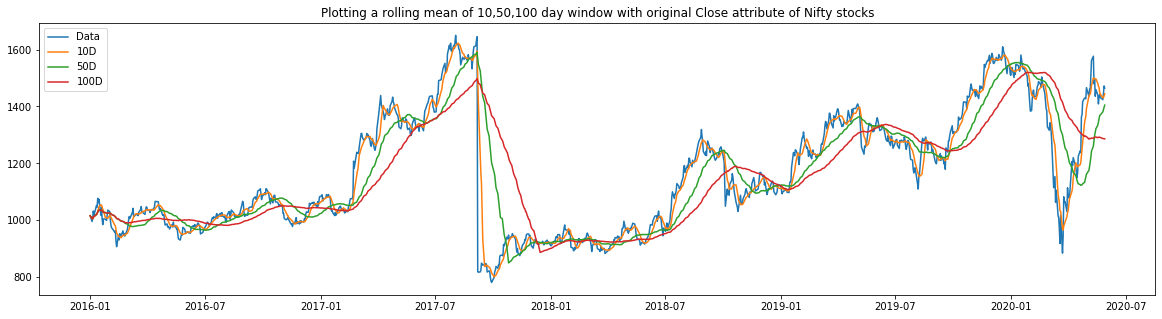

In [12]:
some_part_of_data = data['2016':'2020']

rolling_nifty_50_df_10 = some_part_of_data['Close'].rolling('10D').mean()
rolling_nifty_50_df_50 = some_part_of_data['Close'].rolling('50D').mean()
rolling_nifty_50_df_100 = some_part_of_data['Close'].rolling('100D').mean()

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(some_part_of_data.index,some_part_of_data['Close'])
ax.plot(rolling_nifty_50_df_10.index, rolling_nifty_50_df_10)
ax.plot(rolling_nifty_50_df_50.index, rolling_nifty_50_df_50)
ax.plot(rolling_nifty_50_df_100.index, rolling_nifty_50_df_100)
ax.set_title("Plotting a rolling mean of 10,50,100 day window with original Close attribute of Nifty stocks")
plt.legend(['Data','10D','50D','100D'])
plt.show()

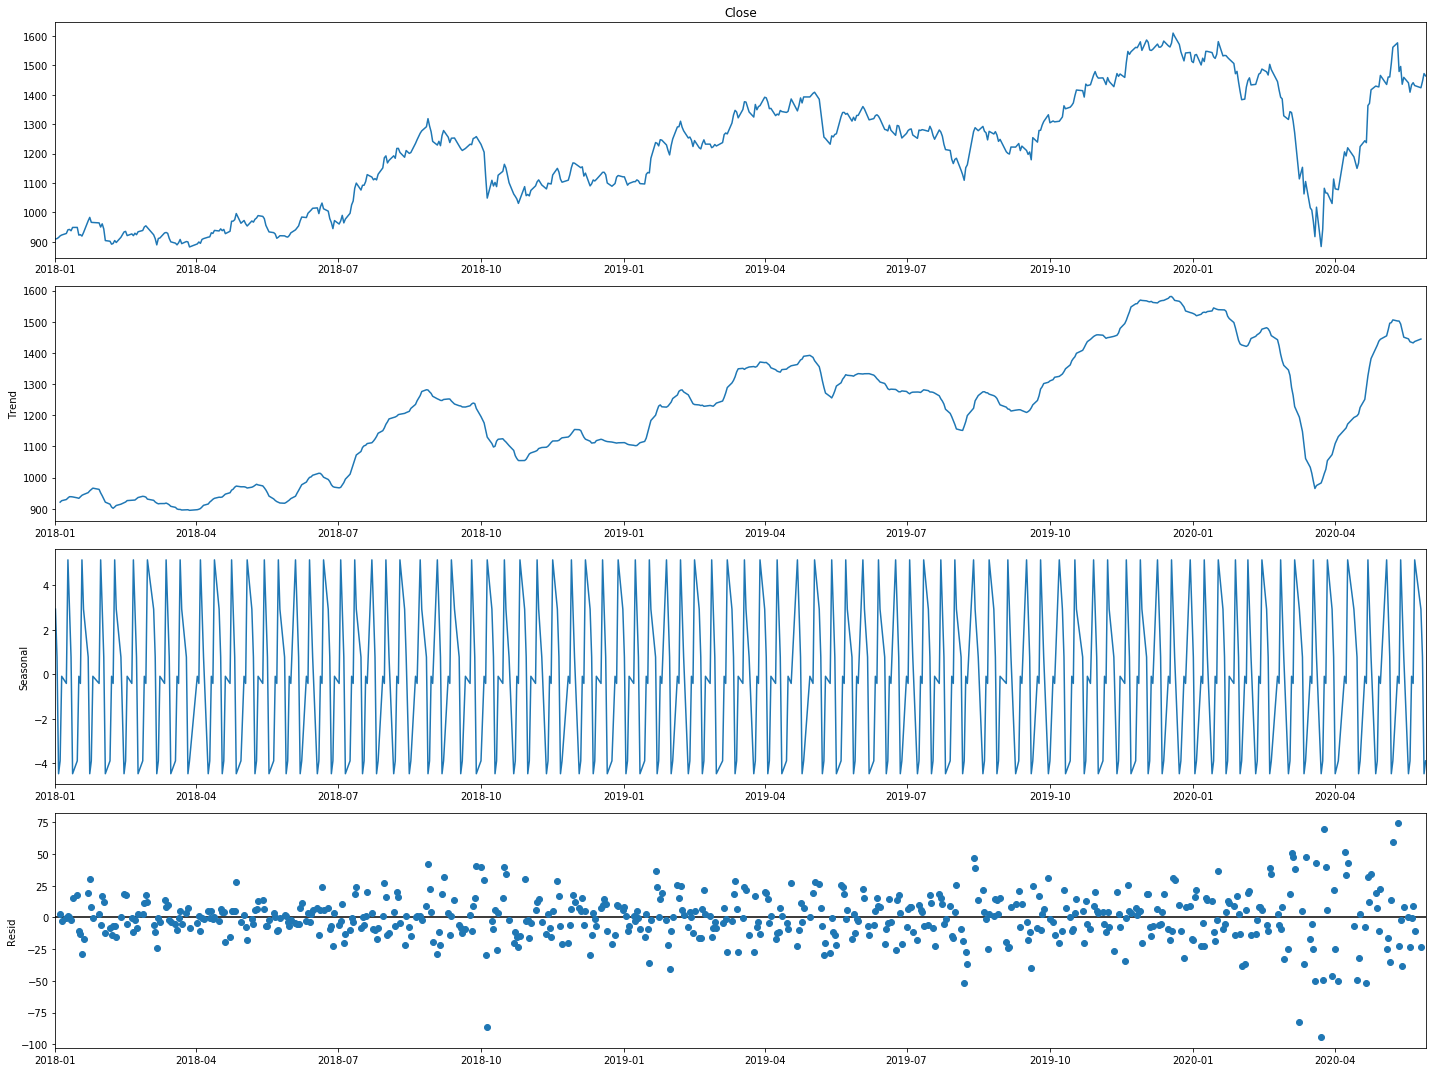

In [13]:
decomposition_data = data['2018':'2020']
decomp_results = seasonal_decompose(decomposition_data['Close'], freq=7)
plt.rcParams["figure.figsize"] = (20,15)
figure = decomp_results.plot()

plt.show()

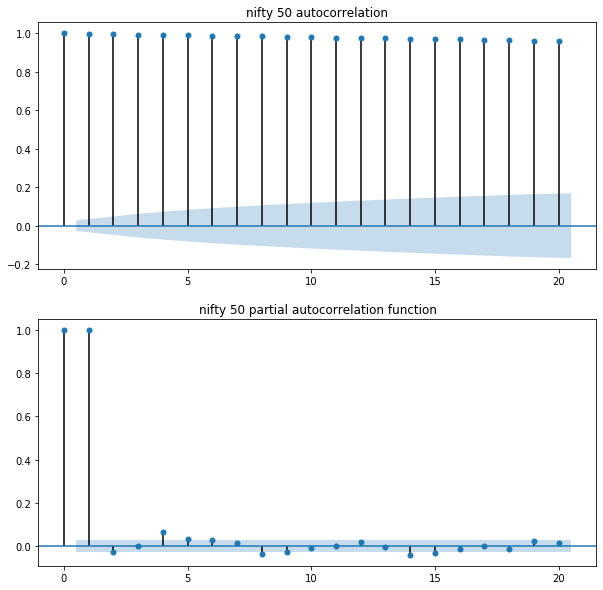

In [14]:
plt.figure(figsize=(10,10))

# ACF of Nifty 50 close price
ax1 = plt.subplot(211)
plot_acf(data["Close"], lags="20",title="nifty 50 autocorrelation",ax=ax1)

# PACF of Nifty 50 close price
ax2 = plt.subplot(212)
plot_pacf(data["Close"], lags="20",title="nifty 50 partial autocorrelation function",ax=ax2)

plt.show()

In [15]:
train_data = data["Close"]["2018":"4-15-2020"]
test_data =  data["Close"]["4-15-2020":]

In [16]:
order_aic_bic =[] 
# Loop over AR order 
for p in range(6): 
    # Loop over MA order 
    for q in range(3): 
        # Fit model 
        for d in range(2):
            model = SARIMAX(train_data, order=(p,d,q)) 
            results = model.fit() 
            # Add order and scores to list 
            order_aic_bic.append((p,d, q, results.aic, results.bic))

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [17]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])
#short value by aic and get value of p d q
order_df.sort_values('aic')[:5]

,p,d,q,aic,bic
23,3,1,2,5191.007595,5216.985920
35,5,1,2,5193.390488,5228.028256
17,2,1,2,5196.921829,5218.570433
21,3,1,1,5206.905939,5228.554543
33,5,1,1,5207.774835,5238.082881


In [18]:
model = SARIMAX(train_data, order=(3,1,2)) 
results = model.fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [19]:
mae = np.mean(np.abs(results.resid))
print(mae)

18.67388172371413


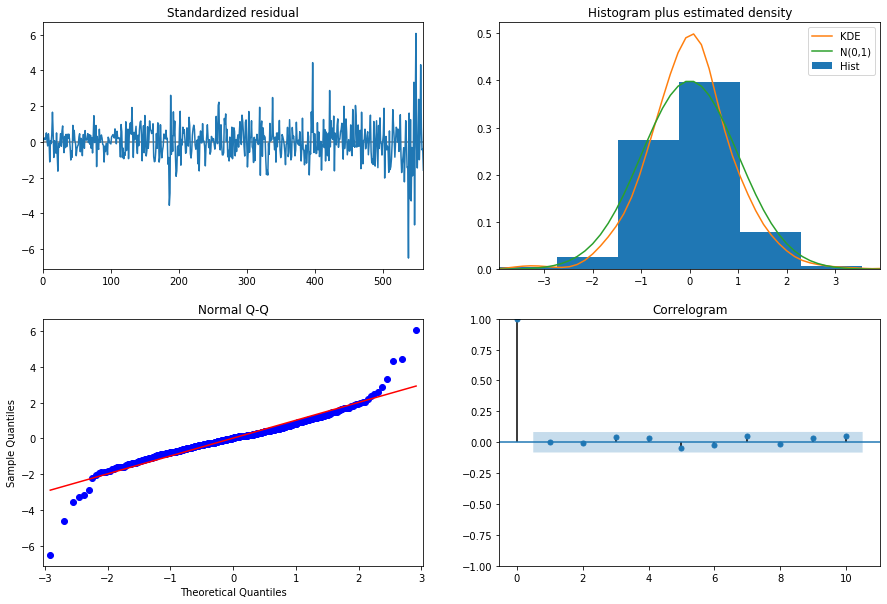

In [20]:
plt.rcParams["figure.figsize"] = (15,10)
results.plot_diagnostics() 
plt.show()

In [21]:
prediction = results.get_prediction(start="7-2019")

In [22]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

In [23]:
forecast = results.get_forecast(steps=len(test_data))

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [24]:
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

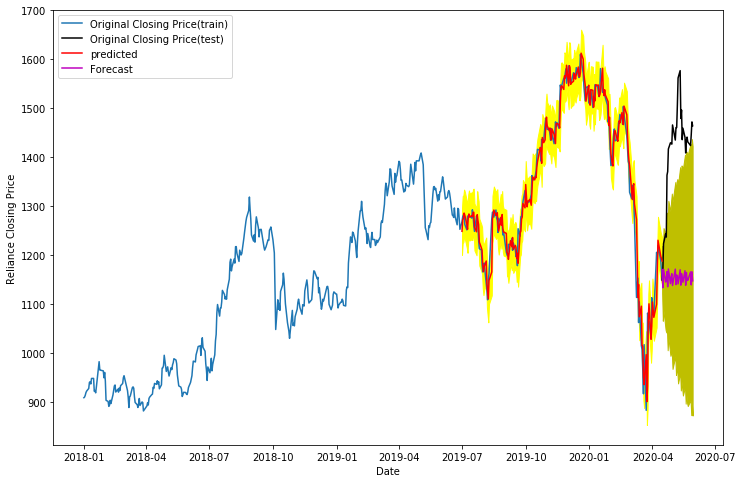

In [25]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='r', label='predicted')
plt.plot(test_data.index, mean_forecast, color='m', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='yellow')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='y')

plt.xlabel('Date')
plt.ylabel('Reliance Closing Price')
plt.legend()
plt.show()


In [27]:
data=pd.read_csv('datasets_423609_1206191_RELIANCE.csv')
data['Date']=pd.to_datetime(data['Date'])

In [28]:
data.skew().sort_values()

%Deliverble          -0.194337
Low                   1.155808
Last                  1.179037
Close                 1.179820
Prev Close            1.180177
VWAP                  1.180430
Open                  1.189617
High                  1.207073
Trades                3.955200
Volume                4.422537
Deliverable Volume    4.619739
Turnover              4.935891
dtype: float64

In [29]:
data.kurtosis().sort_values()

%Deliverble           -0.641445
Low                    1.680005
Last                   1.731120
Close                  1.731890
Prev Close             1.732689
VWAP                   1.737330
Open                   1.772613
High                   1.807032
Trades                24.989754
Volume                37.086226
Deliverable Volume    46.372186
Turnover              47.041554
dtype: float64

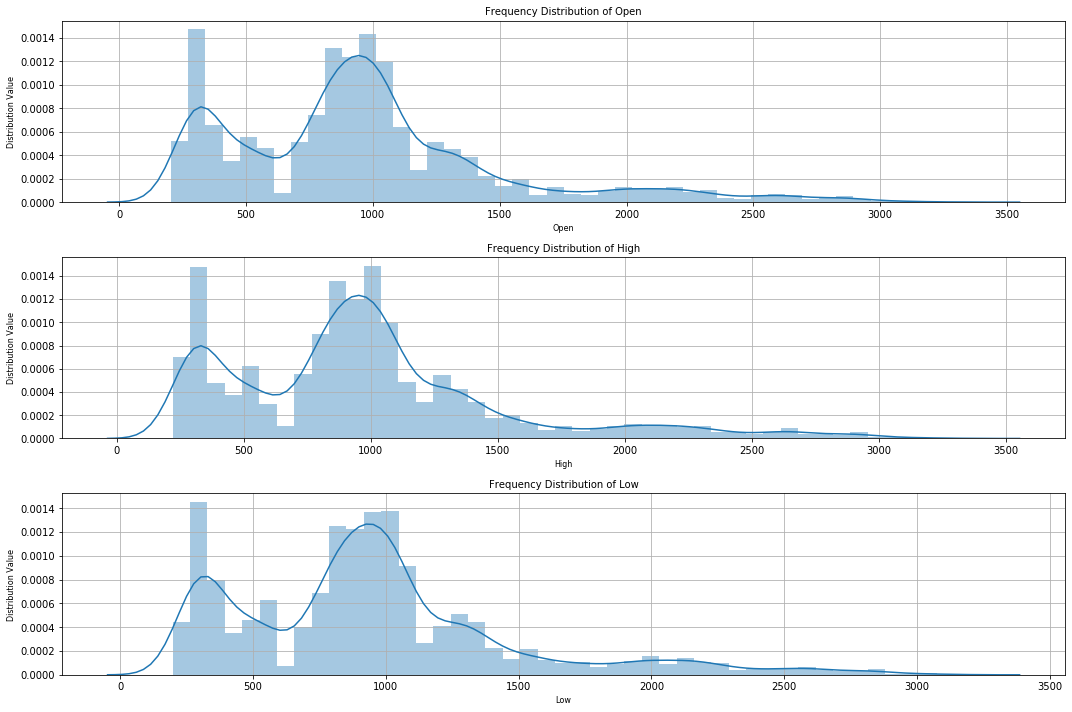

In [31]:
Column_List = ['Open', 'High', 'Low']
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on')

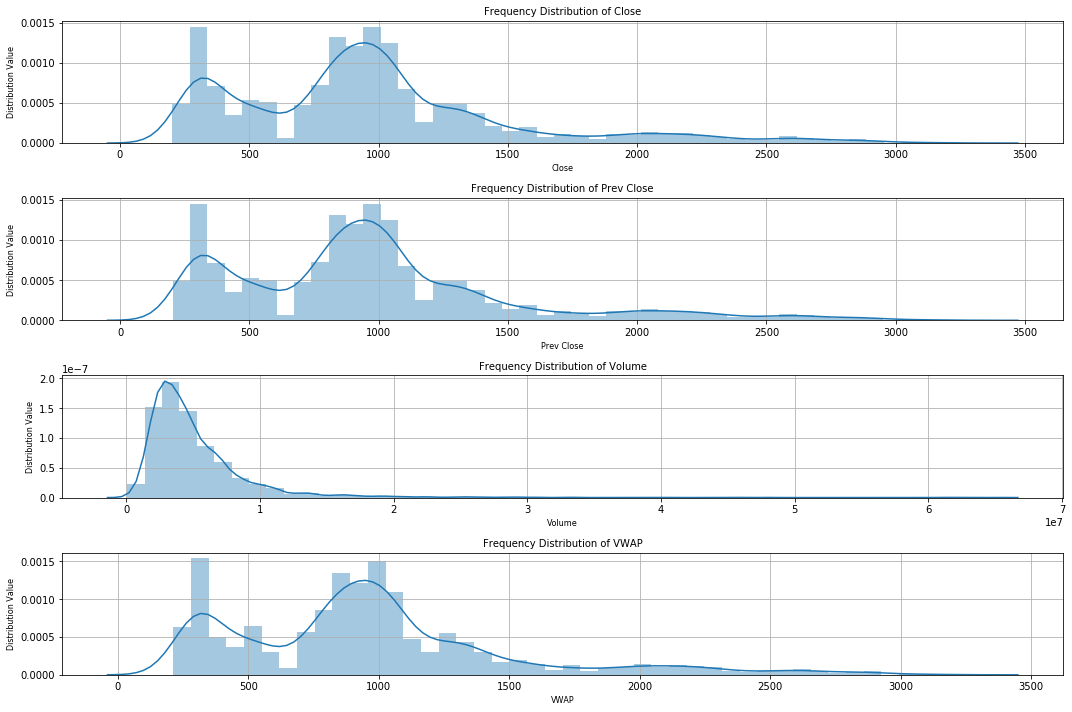

In [32]:
Column_List = ['Close', 'Prev Close', 'Volume','VWAP']
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on')

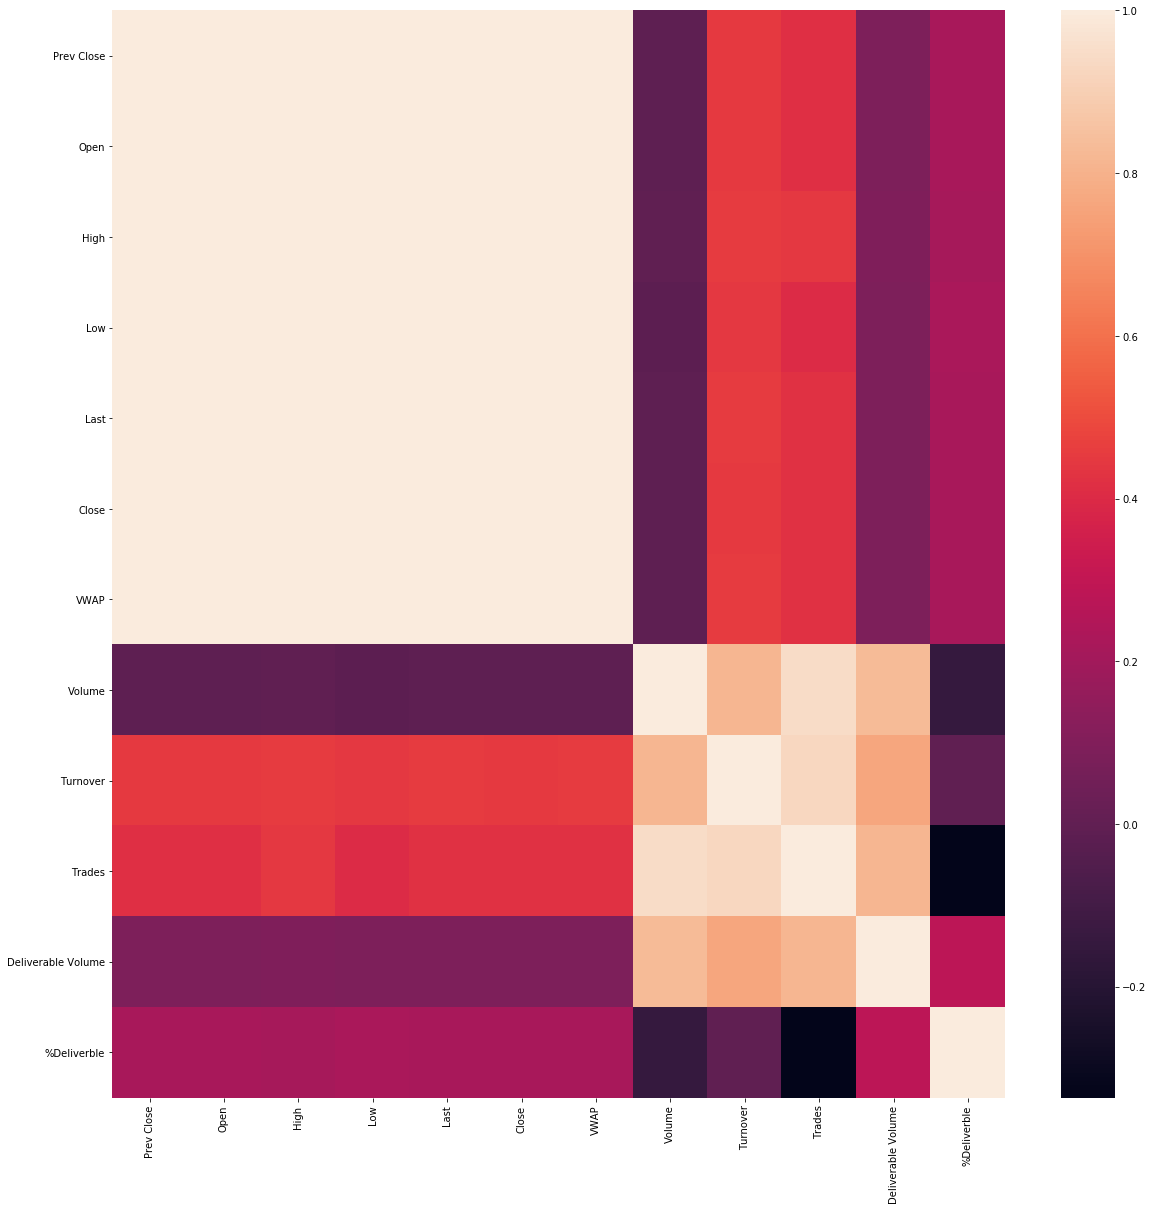

In [33]:
fig.ax=plt.subplots(figsize=(20,20))
corr_matrix=data.corr()
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)


In [34]:
corr_matrix

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.998942,0.998530,0.998395,0.998058,0.998127,0.998651,-0.009410,0.450996,0.416347,0.091054,0.219819
Open,0.998942,1.000000,0.999435,0.999271,0.998776,0.998860,0.999391,-0.010542,0.450704,0.419218,0.090918,0.219579
High,0.998530,0.999435,1.000000,0.998974,0.999334,0.999402,0.999662,-0.003257,0.456779,0.441474,0.094599,0.214179
Low,0.998395,0.999271,0.998974,1.000000,0.999373,0.999429,0.999665,-0.015701,0.445870,0.402905,0.086951,0.224986
Last,0.998058,0.998776,0.999334,0.999373,1.000000,0.999977,0.999748,-0.008554,0.451875,0.424187,0.090677,0.218441
Close,0.998127,0.998860,0.999402,0.999429,0.999977,1.000000,0.999807,-0.008760,0.451636,0.423707,0.090426,0.218455
VWAP,0.998651,0.999391,0.999662,0.999665,0.999748,0.999807,1.000000,-0.008916,0.451838,0.422982,0.090602,0.219209
Volume,-0.009410,-0.010542,-0.003257,-0.015701,-0.008554,-0.008760,-0.008916,1.000000,0.816291,0.944997,0.829191,-0.145140
Turnover,0.450996,0.450704,0.456779,0.445870,0.451875,0.451636,0.451838,0.816291,1.000000,0.931535,0.764896,-0.003660
Trades,0.416347,0.419218,0.441474,0.402905,0.424187,0.423707,0.422982,0.944997,0.931535,1.000000,0.812552,-0.336548


In [35]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekDay'] = data['Date'].dt.weekday

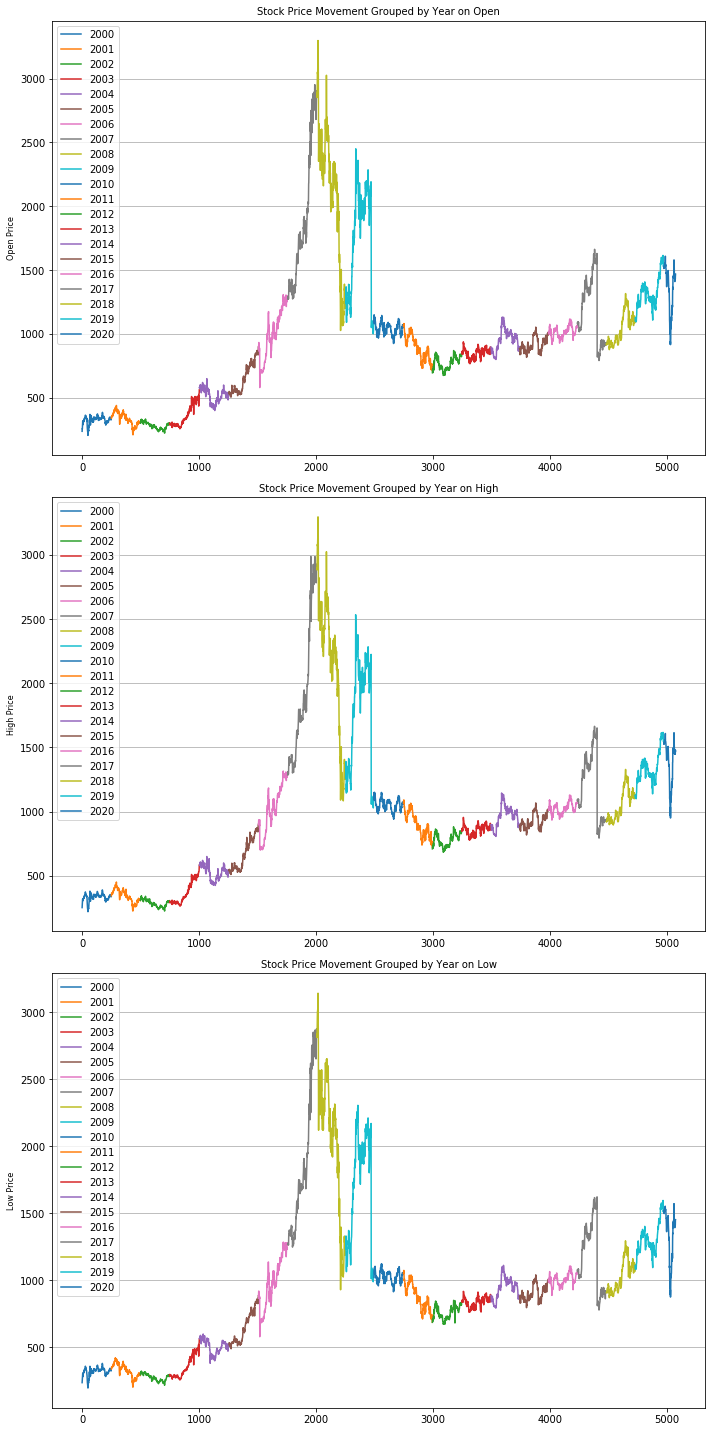

In [36]:
Column_List = ['Open', 'High', 'Low']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

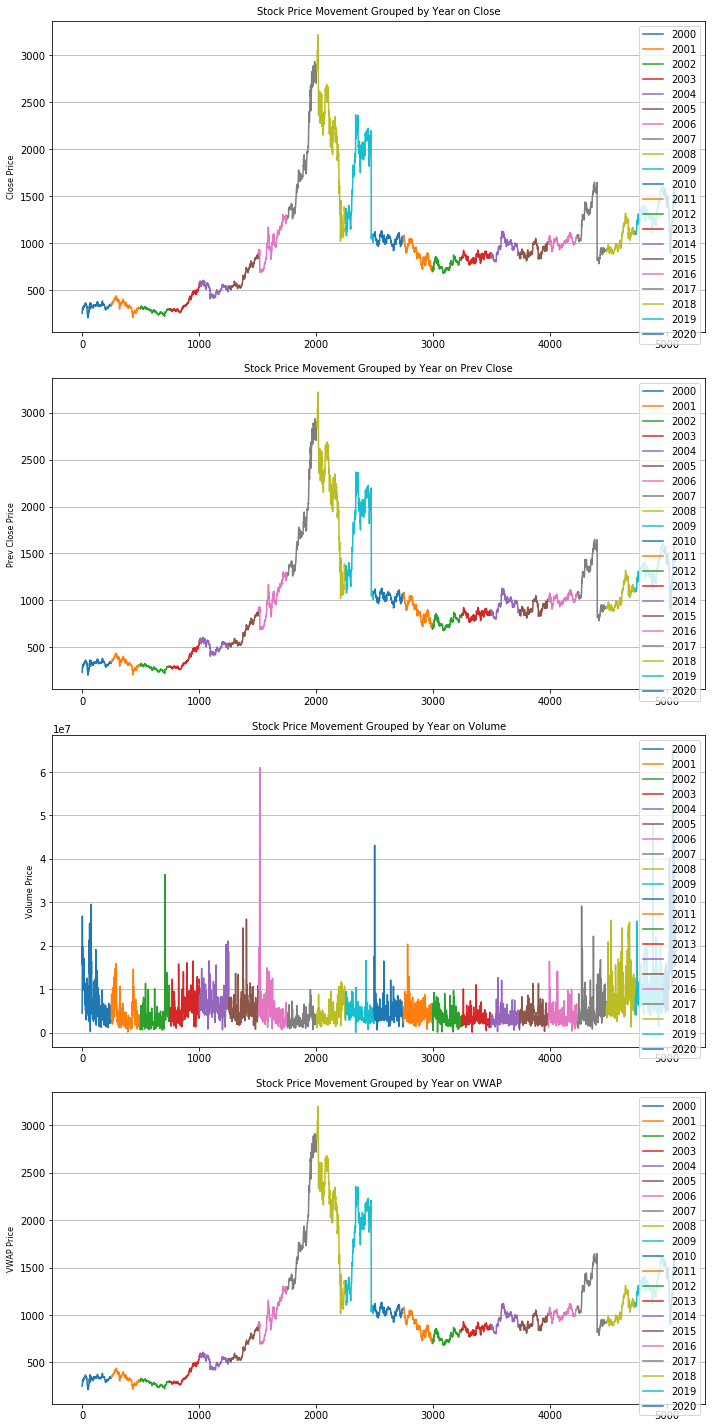

In [37]:
Column_List = ['Close', 'Prev Close', 'Volume','VWAP']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

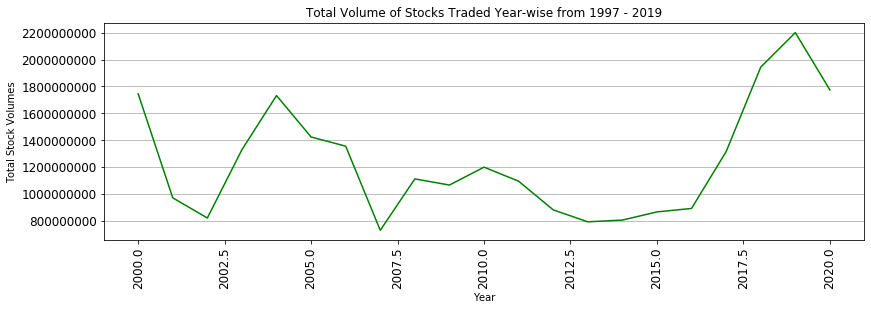

In [38]:
check = data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 1997 - 2019", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

In [41]:
Column_List = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume']

In [42]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('Year')[col_list].sum()
    
var=pd.DataFrame(var)

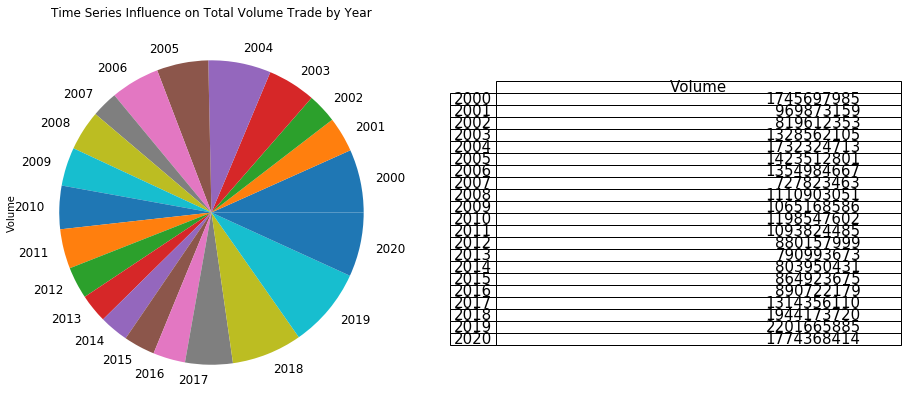

In [44]:
# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(30)
tbl.set_fontsize(15)
plt.show()


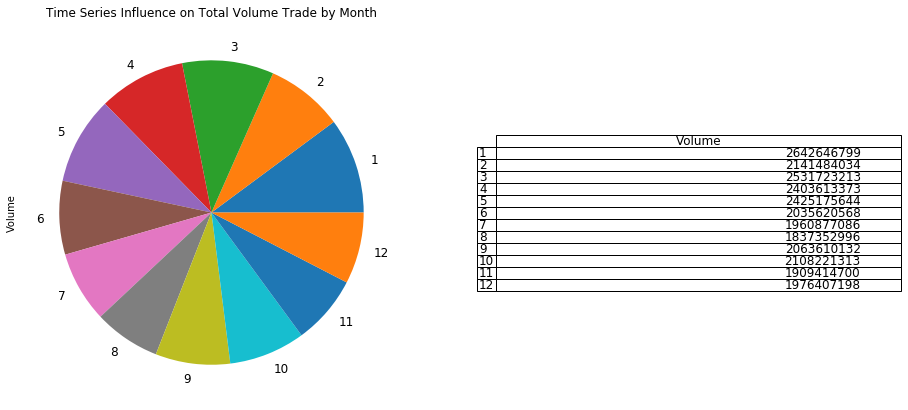

In [48]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

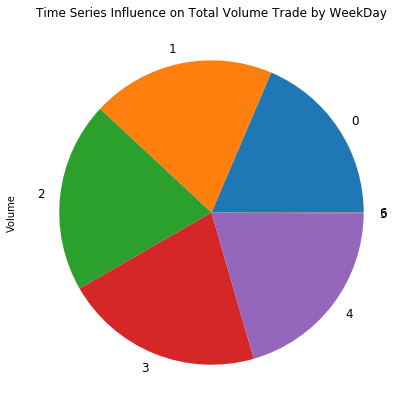

In [49]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('WeekDay')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

In [50]:
from fbprophet import Prophet

In [51]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Year', 'Month', 'WeekDay'],
      dtype='object')

In [52]:
data=data.drop(columns=['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Year', 'Month', 'WeekDay'])

In [53]:
data=data.rename(columns={'Date':'ds'})
data=data.rename(columns={'VWAP':'y'})
data

,ds,y
0,2000-01-03,249.37
1,2000-01-04,263.52
2,2000-01-05,274.79
3,2000-01-06,295.45
4,2000-01-07,308.91
...,...,...
5070,2020-05-22,1442.31
5071,2020-05-26,1428.70
5072,2020-05-27,1430.20
5073,2020-05-28,1467.50


In [54]:
m=Prophet()
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
predper = 120

In [56]:
future = m.make_future_dataframe(periods=predper)
future.tail()

,ds
5190,2020-09-22
5191,2020-09-23
5192,2020-09-24
5193,2020-09-25
5194,2020-09-26


In [57]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5190,2020-09-22,1369.316705,1157.977669,1577.632355
5191,2020-09-23,1371.940395,1162.505081,1608.349516
5192,2020-09-24,1373.895070,1161.733529,1592.736057
5193,2020-09-25,1370.822353,1158.779950,1578.623522
5194,2020-09-26,1400.715239,1195.850741,1635.914010


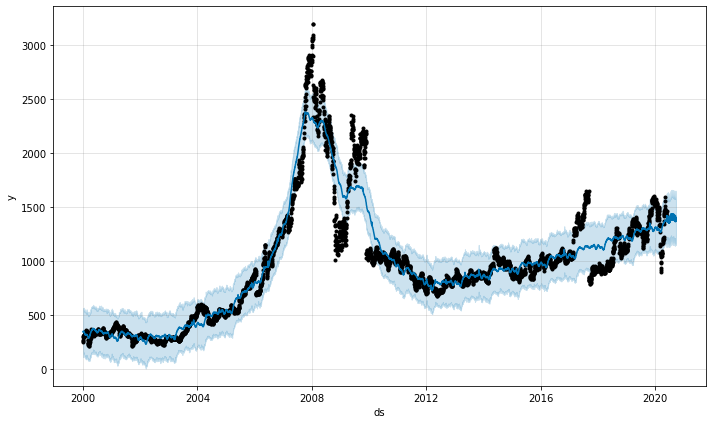

In [58]:
fig1 = m.plot(forecast)

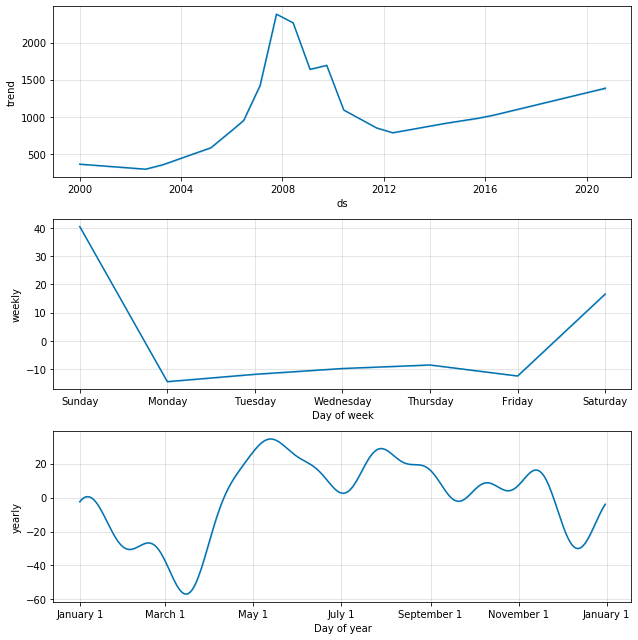

In [59]:
fig2 = m.plot_components(forecast)

In [60]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [61]:
df_cv = cross_validation(m, initial='800 days', period='200 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 32 forecasts with cutoffs between 2002-06-08 00:00:00 and 2019-05-30 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-06-10,281.765788,256.402376,306.043645,281.68,2002-06-08
1,2002-06-11,279.949558,252.469210,305.545115,289.06,2002-06-08
2,2002-06-12,280.669487,254.637197,305.859466,286.47,2002-06-08
3,2002-06-13,281.028223,255.967298,308.659036,285.72,2002-06-08
4,2002-06-14,281.274786,257.389831,308.692980,281.60,2002-06-08


In [62]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,88755.523360,297.918652,187.277993,0.160559,0.127452,0.524696
1,38 days,90152.949731,300.254808,188.935181,0.161775,0.127462,0.520973
2,39 days,90910.158099,301.513114,189.590879,0.161987,0.127927,0.523174
3,40 days,90358.725558,300.597281,189.121443,0.162086,0.127981,0.519922
4,41 days,90506.401836,300.842819,189.851204,0.162683,0.129195,0.513382


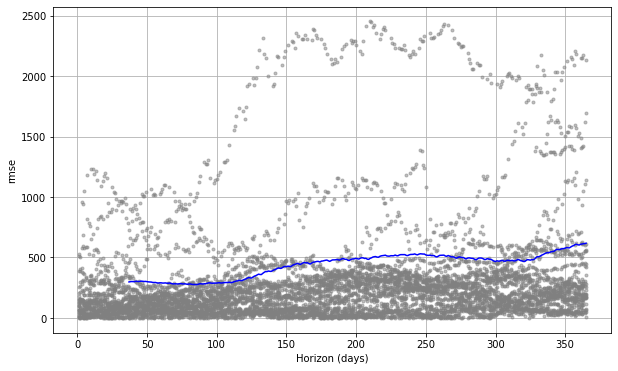

In [63]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')